In [2]:
import scipy.io as sio
Data1 = sio.loadmat( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Preprocessed_Part_1.mat' )# Data1 is a dictionary whose key is 'Part_1'
Data3 = sio.loadmat( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Preprocessed_Part_3.mat' )
RawData1 = sio.loadmat( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Part_1.mat' )

In [3]:
import sys 
!{sys.executable} -m pip install numpy
#原文網址：https://kknews.cc/code/albn6qx.html
import heartpy as hp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 

In [5]:
#Data Rearrange and Merge Data1 and Data3
RearrangedData = { 'ppg':[], 'ecg':[], 'abp':[] }#Reaaranged Data1 and Data3
TempList = ['ppg', 'ecg', 'abp']
for i in range( len(Data1['preprocessed_Part_1'][0]) ):
    for j in range( len(Data1['preprocessed_Part_1'][0][0]) ):
        RearrangedData[TempList[j]].append( Data1['preprocessed_Part_1'][0][i][j] )
for i in range( len(Data3['preprocessed_Part_3'][0]) ):
    for j in range( len(Data3['preprocessed_Part_3'][0][0]) ):
        RearrangedData[TempList[j]].append( Data3['preprocessed_Part_3'][0][i][j] )

In [5]:
for i in TempList:
    print( len(RearrangedData[i]) )

6000
6000
6000


In [6]:
#get mean, max, min of RawData1
def getMeanofRawData1():
    Mean = []
    for i in range( len(RawData1['Part_1'][0]) ):
        Mean.append( np.mean( RawData1['Part_1'][0][i][0] ) )
    return Mean
def get_MinandMaxofRawData1():
    Min = []
    Max = []
    for i in range( len(RawData1['Part_1'][0]) ):
        Min.append( min( RawData1['Part_1'][0][i][0] ) )
        Max.append( max( RawData1['Part_1'][0][i][0] ) )
    return min( Min ), max( Max )
def get_StandardDeviationofRawData1():
    Sigma = []
    for i in range( len(RawData1['Part_1'][0]) ):
        Sigma.append( np.std(RawData1['Part_1'][0][i][0]) )
    return Sigma

#Declaration of Attribute Table
AttributeTable = {}
AttributeTable['Sampling_Rate'] = 125.0 #sampling rate = 125Hz
AttributeTable['Meanofppg'] = getMeanofRawData1()
AttributeTable['Sigmaofppg'] = get_StandardDeviationofRawData1()

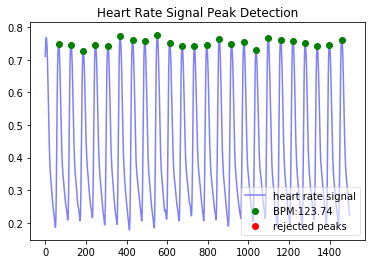

{'hr': array([0.71054432, 0.73293951, 0.74994686, ..., 0.23244654, 0.22838032,
        0.22371677]),
 'peaklist': array([  66,  126,  187,  247,  309,  369,  430,  490,  552,  613,  674,
         734,  795,  857,  917,  978, 1038, 1098, 1159, 1220, 1280, 1339,
        1399, 1460], dtype=int64),
 'ybeat': array([0.7494482 , 0.74646803, 0.72538642, 0.74523809, 0.74253462,
        0.77348265, 0.76085246, 0.75690274, 0.77514185, 0.7498528 ,
        0.74187953, 0.74276873, 0.74440383, 0.76377513, 0.74764008,
        0.75354766, 0.72832748, 0.7655114 , 0.76134201, 0.75839786,
        0.75010718, 0.741511  , 0.74580919, 0.76091064]),
 'rolling_mean': array([0.45063155, 0.45063155, 0.45063155, ..., 0.45063155, 0.45063155,
        0.45063155]),
 'RR_list': array([480., 488., 480., 496., 480., 488., 480., 496., 488., 488., 480.,
        488., 496., 480., 488., 480., 480., 488., 488., 480., 472., 480.,
        488.]),
 'RR_indices': [(66, 126),
  (126, 187),
  (187, 247),
  (247, 309),
  (309, 36

In [14]:
working_data, measures = hp.process(RearrangedData['ppg'][0][1500:3000], 125.0)
hp.plotter(working_data, measures)
working_data

In [16]:
AttributeTable['R-peakIndex'] = []
AttributeTable['R-peakValue'] = []
def get_peakIndexofecg():
    for i in range( len(RearrangedData['ecg']) ):
        #get peak index of ppg
        temp = []
        temp = np.array( temp )
        j = 0
        while j < len(RearrangedData['ecg'][i]):
            if ( len(RearrangedData['ecg'][i]) - j) > 1000:
                working_data, measures = hp.process(RearrangedData['ecg'][i][j:(j+1000)], AttributeTable['Sampling_Rate'] )
            else:
                working_data, measures = hp.process(RearrangedData['ecg'][i][j:( len(RearrangedData['ecg'][i])-1 )], AttributeTable['Sampling_Rate'] )
            temp = np.append( working_data['peaklist'], working_data['removed_beats'] )
            j = j + 1000;
        temp = np.argsort( temp )
        AttributeTable['R-peakIndex'].append( temp )
    return
get_peakIndexofecg()

BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


In [10]:
def get_peakValueofppg():
    for i in range( len(RearrangedData['ppg']) ):
        #get peak index of ppg
        working_data, measures = hp.process(RearrangedData['ppg'][i], AttributeTable['Sampling_Rate'] )
        temp = np.append( working_data['peaklist'], working_data['removed_beats'] )
        temp = np.argsort( temp )
        AttributeTable['peaklistofppg'].append( temp )
    return